## Load Modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd

## Less matrix than subjects, grabbing respective labels into y

In [2]:
data=pd.read_csv('adni_data_1_mor.csv',header=0)
data=np.array(data)
datasubjid=data[:,0]
print(datasubjid.shape)
matsubjid=pd.read_csv('adni_connectome_subjectlist.csv',header=0)
matsubjid=np.array(matsubjid)
print(matsubjid.shape)

filtindex=np.isin(datasubjid,matsubjid)
filtindex=filtindex.ravel()
labels=data[:,13]
y=labels[filtindex]
print(y.shape)

morphdata=data[filtindex]
print(morphdata.shape)

mask=np.ones([1044])
mask[0:14]=0
mask[24:37]=0
mask=mask>=1

morphdata=morphdata[:,mask]
print(morphdata.shape)



(201,)
(179, 1)
(179,)
(179, 1044)
(179, 1017)


## Get index for X and y for experiment

In [3]:
# smi=1 , mci=2, ad=3

smiloc=np.asarray(np.where(y==1))
smiloc=np.ndarray.transpose(smiloc)
mciloc=np.asarray(np.where(y==2))
mciloc=np.ndarray.transpose(mciloc)
adloc=np.asarray(np.where(y==3))
adloc=np.ndarray.transpose(adloc)

#1v3, smi=0, ad=1
totalsize=len(smiloc)+len(adloc)
y_adsmi=np.zeros([totalsize])
Xvar_adsmi=np.zeros([totalsize,1017])
for i in range(len(smiloc)):
    y_adsmi[i]=0
    Xvar_adsmi[i,:]=morphdata[smiloc[i],:]
for j in range(len(adloc)):
    y_adsmi[len(smiloc)+j]=1
    Xvar_adsmi[len(smiloc)+j,:]=morphdata[adloc[j],:]
print(y_adsmi.shape)
print(Xvar_adsmi.shape)

#1v2, smi=0, mci=1
totalsize=len(smiloc)+len(mciloc)
y_mcismi=np.zeros([totalsize])
Xvar_mcismi=np.zeros([totalsize,1017])
for i in range(len(smiloc)):
    y_mcismi[i]=0
    Xvar_mcismi[i,:]=morphdata[smiloc[i],:]
for j in range(len(mciloc)):
    y_mcismi[len(smiloc)+j]=1
    Xvar_mcismi[len(smiloc)+j,:]=morphdata[mciloc[j],:]
print(y_mcismi.shape)
print(Xvar_mcismi.shape)

#2v3, mci=0, ad=1
totalsize=len(mciloc)+len(adloc)
y_admci=np.zeros([totalsize])
Xvar_admci=np.zeros([totalsize,1017])
for i in range(len(mciloc)):
    y_admci[i]=0
    Xvar_admci[i,:]=morphdata[mciloc[i],:]
for j in range(len(adloc)):
    y_admci[len(mciloc)+j]=1
    Xvar_admci[len(mciloc)+j,:]=morphdata[adloc[j],:]
print(y_admci.shape)
print(Xvar_admci.shape)




(119,)
(119, 1017)
(131,)
(131, 1017)
(108,)
(108, 1017)


## Run CNN with 5fold CV for AD_SMI

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 80.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 88.0%
epoch 3 
epoch 4 
Best validation accuracy! iteration:36 accuracy: 92.0%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 96.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
ep

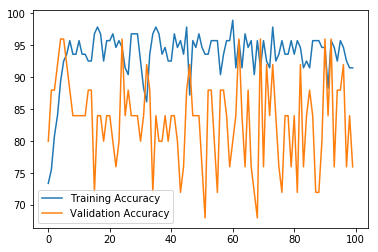

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 75.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 83.33333333333333%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 87.5%
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 91.66666666666667%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 

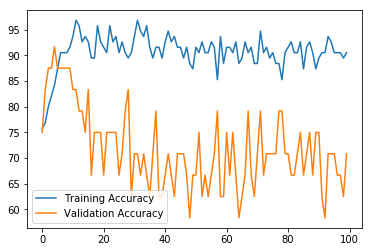

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 66.66666666666666%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 70.83333333333333%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 75.0%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 83.33333333333333%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:99 accuracy: 87.5%
epoch 12 
Best validation accuracy! iteration:108 accuracy: 91.66666666666667%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 

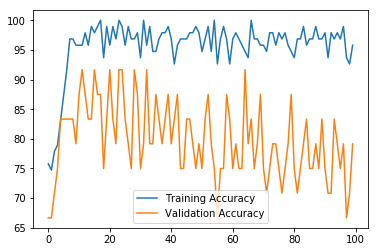

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 65.21739130434783%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 69.56521739130434%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 73.91304347826087%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:90 accuracy: 78.26086956521739%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:171 accuracy: 82.6086956521739%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
ep

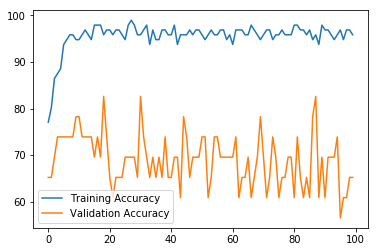

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 69.56521739130434%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 73.91304347826087%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 78.26086956521739%
epoch 6 
Best validation accuracy! iteration:54 accuracy: 82.6086956521739%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
Best validation accuracy! iteration:297 accuracy: 86.95652173913044%
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
ep

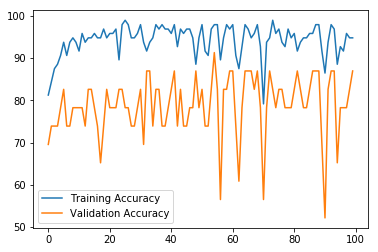

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 64.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 68.0%
epoch 3 
epoch 4 
Best validation accuracy! iteration:36 accuracy: 72.0%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:99 accuracy: 76.0%
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:126 accuracy: 80.0%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:189 accuracy: 84.0%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 


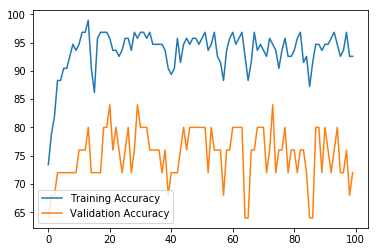

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 75.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 83.33333333333333%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 91.66666666666667%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:63 accuracy: 95.83333333333333%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epo

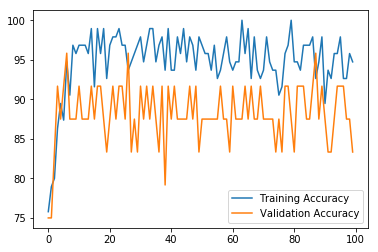

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 70.83333333333333%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 79.16666666666667%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 83.33333333333333%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:153 accuracy: 87.5%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
ep

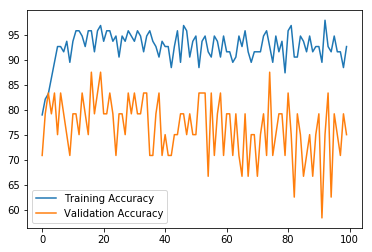

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 78.26086956521739%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 82.6086956521739%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 86.95652173913044%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 

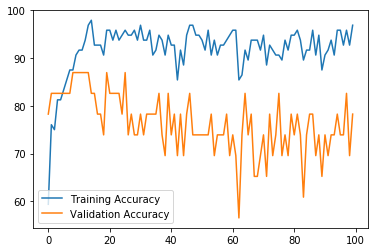

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 82.6086956521739%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
Best validation accuracy! iteration:567 accuracy: 86.95652173913044%
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

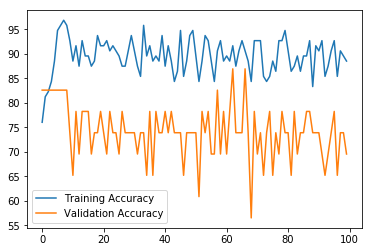

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 68.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 76.0%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 84.0%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 88.0%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 92.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

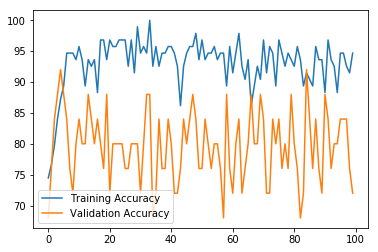

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 75.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 79.16666666666667%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:207 accuracy: 83.33333333333333%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:405 accuracy: 87.5%
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoc

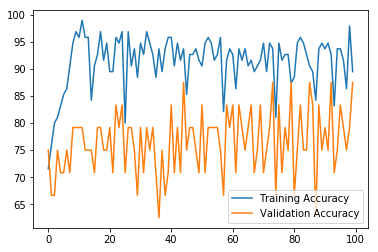

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 75.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 79.16666666666667%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:117 accuracy: 83.33333333333333%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 


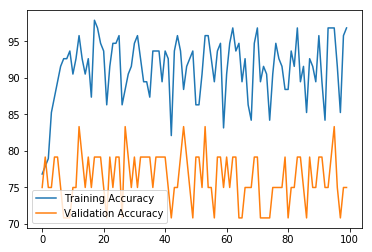

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 78.26086956521739%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 82.6086956521739%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 6

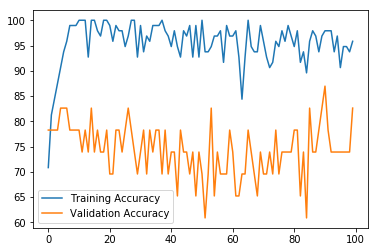

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 69.56521739130434%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 78.26086956521739%
epoch 3 
epoch 4 
Best validation accuracy! iteration:36 accuracy: 82.6086956521739%
epoch 5 
epoch 6 
Best validation accuracy! iteration:54 accuracy: 86.95652173913044%
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 91.30434782608695%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:225 accuracy: 95.65217391304348%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoc

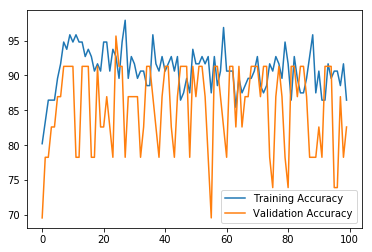

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 68.0%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:36 accuracy: 72.0%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 76.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:108 accuracy: 92.0%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
e

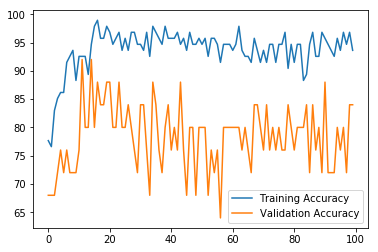

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 75.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 79.16666666666667%
epoch 3 
epoch 4 
Best validation accuracy! iteration:36 accuracy: 83.33333333333333%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:63 accuracy: 87.5%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:99 accuracy: 91.66666666666667%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
Best validation accuracy! iteration:243 accuracy: 95.83333333333333%
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 

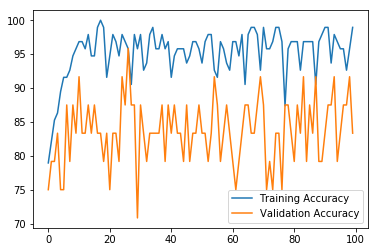

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 75.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:90 accuracy: 79.16666666666667%
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:117 accuracy: 83.33333333333333%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 


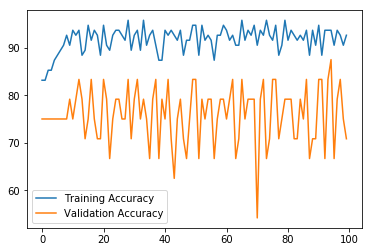

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 73.91304347826087%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 82.6086956521739%
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 86.95652173913044%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 

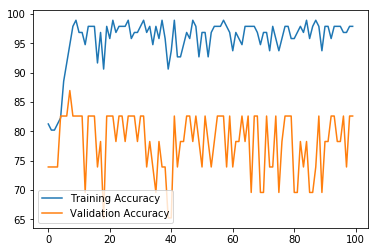

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 65.21739130434783%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 78.26086956521739%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 82.6086956521739%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 86.95652173913044%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
e

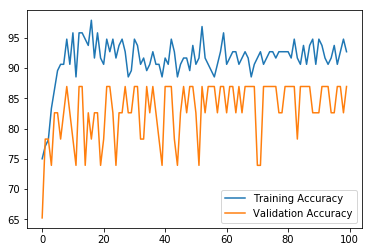

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 84.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 88.0%
epoch 9 
epoch 10 
Best validation accuracy! iteration:90 accuracy: 92.0%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
Best validation accuracy! iteration:333 accuracy: 96.0%
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
e

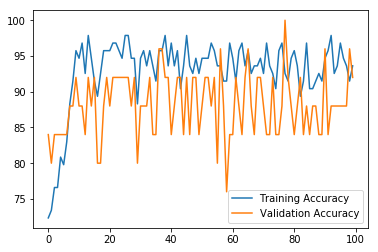

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 70.83333333333333%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:36 accuracy: 75.0%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:135 accuracy: 79.16666666666667%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 


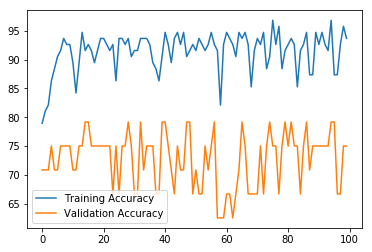

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 58.333333333333336%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 66.66666666666666%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 70.83333333333333%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 79.16666666666667%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:126 accuracy: 83.33333333333333%
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:153 accuracy: 87.5%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoc

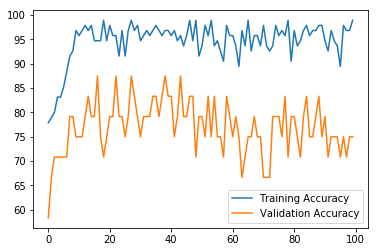

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 86.95652173913044%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 91.30434782608695%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 95.65217391304348%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61

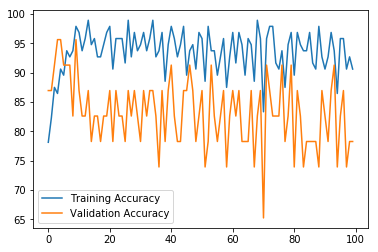

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 73.91304347826087%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 82.6086956521739%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:108 accuracy: 86.95652173913044%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:162 accuracy: 91.30434782608695%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

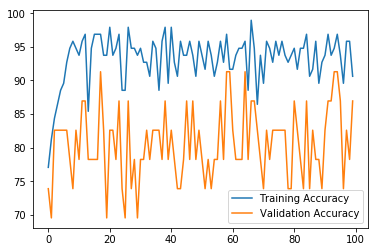

AD_SMI average accuracy is:  89.71217391304349
AD_SMI standard deviation is:  4.925799574614802


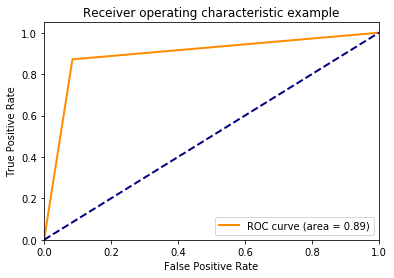

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.NNN_test import nnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(Xvar_adsmi,y_adsmi):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xvar_adsmi[train_index],Xvar_adsmi[test_index]
    y_train,y_test=y_adsmi[train_index],y_adsmi[test_index]
    mask_train = np.random.choice(X_train.shape[0],X_train.shape[0], replace=False)
    X_train=X_train[mask_train,:]
    y_train=y_train[mask_train,]
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=nnn_training(X_train,y_train,X_test,y_test,fc_units=[4000,2000,2], l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_SMI average accuracy is: ',mean_acc)
print('AD_SMI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/ADNI_ADSMI_ROC_curve_NNN.jpg')
plt.show()

## Run CNN with 5fold CV for MCI_SMI

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 62.96296296296296%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:80 accuracy: 66.66666666666666%
epoch 9 
Best validation accuracy! iteration:90 accuracy: 74.07407407407408%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:140 accuracy: 77.77777777777777%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:230 accuracy: 81.48148148148148%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 4

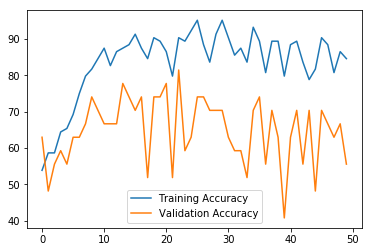

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:40 accuracy: 61.53846153846154%
epoch 5 
Best validation accuracy! iteration:50 accuracy: 65.38461538461539%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:120 accuracy: 76.92307692307692%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 76.92307

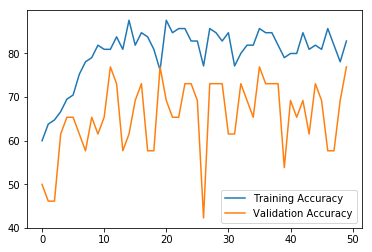

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 61.53846153846154%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 61.53846153846154. Model named nnn_1522270992.


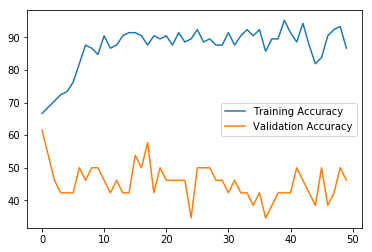

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 65.38461538461539%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 69.23076923076923%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:50 accuracy: 73.07692307692308%
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:80 accuracy: 76.92307692307692%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:340 accuracy: 80.76923076923077%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

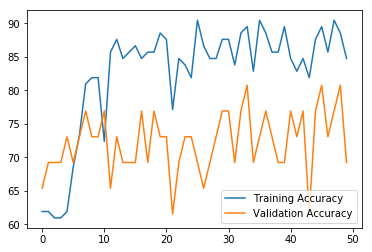

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 61.53846153846154%
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:140 accuracy: 65.38461538461539%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:180 accuracy: 69.23076923076923%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
Best validation accuracy! iteration:390 accuracy: 73.07692307692308%
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch

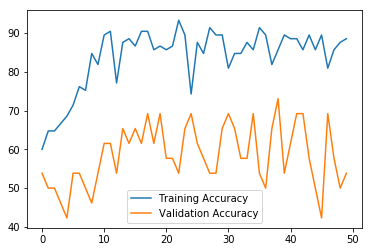

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 62.96296296296296%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:60 accuracy: 66.66666666666666%
epoch 7 
epoch 8 
Best validation accuracy! iteration:80 accuracy: 74.07407407407408%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 74.07407407407408. Model named nnn_1522271083.


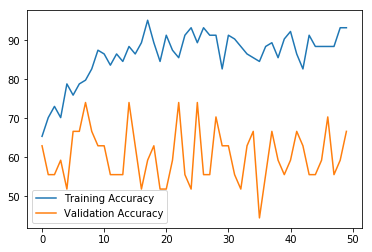

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 57.69230769230769%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
Best validation accuracy! iteration:390 accuracy: 61.53846153846154%
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 61.53846153846154. Model named nnn_1522271113.


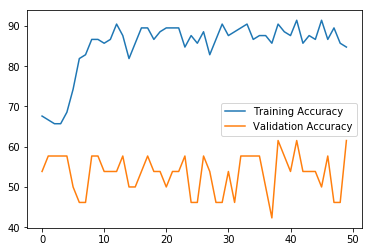

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 46.15384615384615%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 50.0%
epoch 3 
Best validation accuracy! iteration:30 accuracy: 53.84615384615385%
epoch 4 
epoch 5 
Best validation accuracy! iteration:50 accuracy: 57.69230769230769%
epoch 6 
Best validation accuracy! iteration:60 accuracy: 61.53846153846154%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
ep

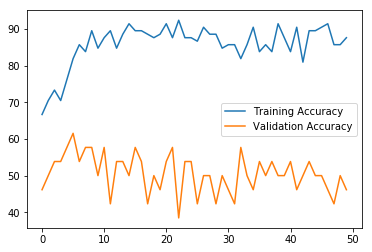

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 69.23076923076923%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 76.92307692307692%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 76.92307692307692. Model named nnn_1522271175.


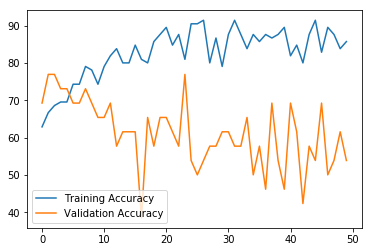

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 61.53846153846154%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:230 accuracy: 65.38461538461539%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 65.38461538461539. Model named nnn_1522271203.


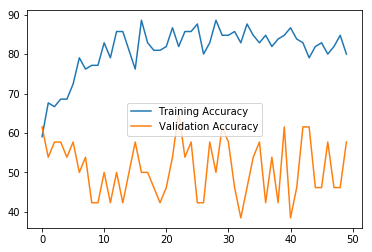

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 55.55555555555556%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 59.25925925925926%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:60 accuracy: 62.96296296296296%
epoch 7 
epoch 8 
Best validation accuracy! iteration:80 accuracy: 66.66666666666666%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy

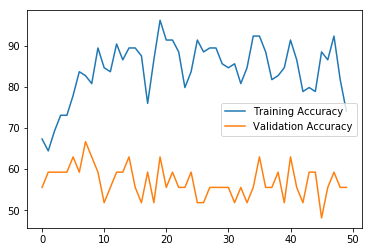

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 46.15384615384615%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 57.69230769230769%
epoch 3 
Best validation accuracy! iteration:30 accuracy: 61.53846153846154%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:120 accuracy: 69.23076923076923%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accurac

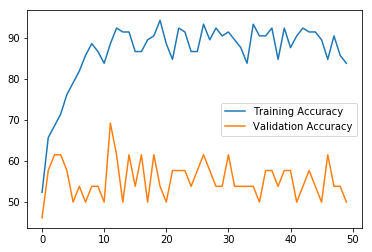

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 69.23076923076923%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:50 accuracy: 73.07692307692308%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 73.07692307692308. Model named nnn_1522271293.


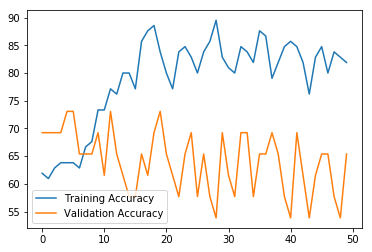

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 65.38461538461539%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 65.38461538461539. Model named nnn_1522271322.


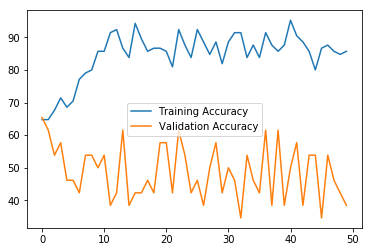

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 46.15384615384615%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 50.0%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:50 accuracy: 53.84615384615385%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:90 accuracy: 57.69230769230769%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:140 accuracy: 65.38461538461539%
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:170 accuracy: 69.23076923076923%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:240 accuracy: 73.07692307692308%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epo

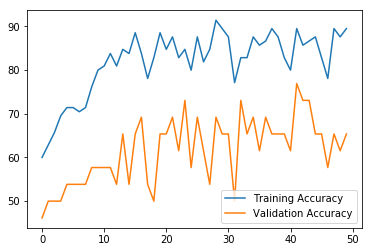

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 55.55555555555556%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 59.25925925925926%
epoch 12 
Best validation accuracy! iteration:120 accuracy: 66.66666666666666%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:260 accuracy: 70.37037037037037%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
Best validation accuracy! iteration:400 accuracy: 74.07407407407408%
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch

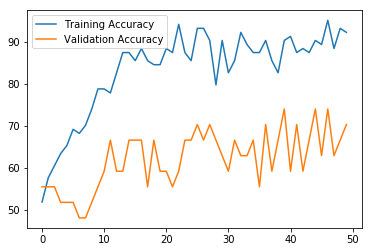

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 46.15384615384615%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 50.0%
epoch 3 
Best validation accuracy! iteration:30 accuracy: 57.69230769230769%
epoch 4 
Best validation accuracy! iteration:40 accuracy: 65.38461538461539%
epoch 5 
Best validation accuracy! iteration:50 accuracy: 73.07692307692308%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 76.92307692307692%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
Best validation accuracy! iteration:330 accuracy: 80.76923076923077%
epoch 34 
epoc

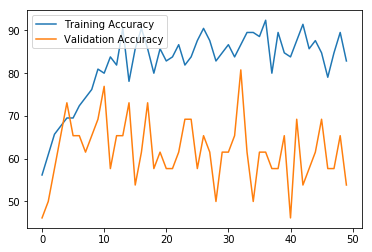

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 61.53846153846154%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 61.53846153846154. Model named nnn_1522271452.


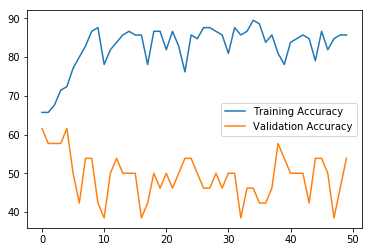

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 69.23076923076923%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 80.76923076923077%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
Best validation accuracy! iteration:430 accuracy: 84.61538461538461%
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 84.61538461538461. Model named nnn_1522271479.


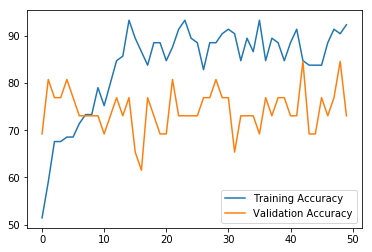

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 65.38461538461539%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 65.38461538461539. Model named nnn_1522271509.


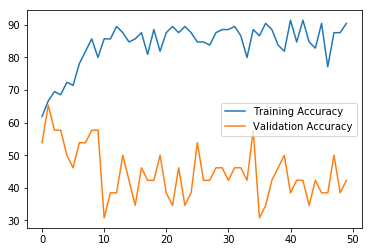

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 51.851851851851855%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 59.25925925925926%
epoch 3 
Best validation accuracy! iteration:30 accuracy: 62.96296296296296%
epoch 4 
Best validation accuracy! iteration:40 accuracy: 74.07407407407408%
epoch 5 
Best validation accuracy! iteration:50 accuracy: 77.77777777777777%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 81.48148148148148%
epoch 12 
epoch 13 
Best validation accuracy! iteration:130 accuracy: 88.88888888888889%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 


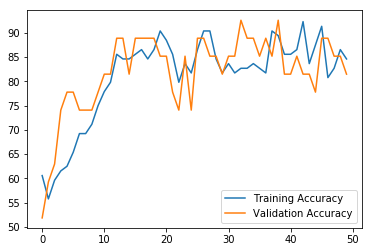

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 57.69230769230769%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:40 accuracy: 61.53846153846154%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:70 accuracy: 65.38461538461539%
epoch 8 
epoch 9 
Best validation accuracy! iteration:90 accuracy: 69.23076923076923%
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:120 accuracy: 73.07692307692308%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:200 accuracy: 76.92307692307692%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 

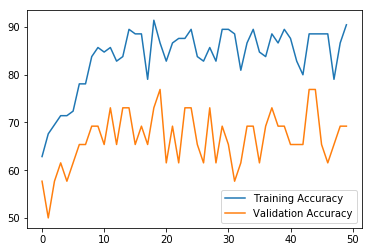

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 57.69230769230769%
epoch 3 
Best validation accuracy! iteration:30 accuracy: 61.53846153846154%
epoch 4 
epoch 5 
Best validation accuracy! iteration:50 accuracy: 69.23076923076923%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy

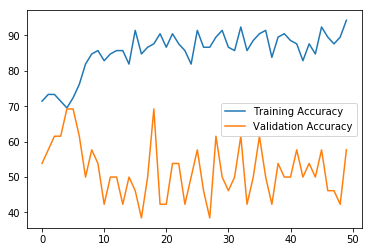

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 57.69230769230769%
epoch 3 
epoch 4 
Best validation accuracy! iteration:40 accuracy: 65.38461538461539%
epoch 5 
Best validation accuracy! iteration:50 accuracy: 69.23076923076923%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:160 accuracy: 73.07692307692308%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:230 accuracy: 76.92307692307692%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
Best validation accura

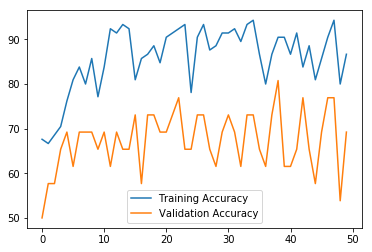

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 57.69230769230769%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 61.53846153846154%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 69.23076923076923%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 69.23076923076923. Model named nnn_1522271673.


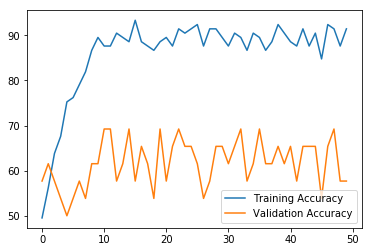

MCI_SMI average accuracy is:  72.7863247863248
MCI_SMI standard deviation is:  8.041709114249427


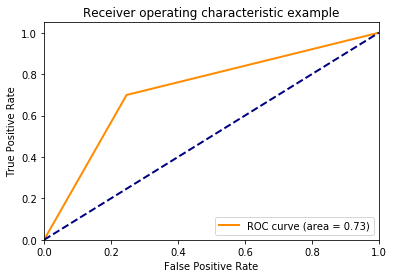

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.NNN_test import nnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(Xvar_mcismi,y_mcismi):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xvar_mcismi[train_index],Xvar_mcismi[test_index]
    y_train,y_test=y_mcismi[train_index],y_mcismi[test_index]
    mask_train = np.random.choice(X_train.shape[0],X_train.shape[0], replace=False)
    X_train=X_train[mask_train,:]
    y_train=y_train[mask_train,]
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=nnn_training(X_train,y_train,X_test,y_test,fc_units=[4000,2000,2], l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=50,batch_size=10)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('MCI_SMI average accuracy is: ',mean_acc)
print('MCI_SMI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/ADNI_MCISMI_ROC_curve_NNN.jpg')
plt.show()

## Run CNN with 5fold CV for AD_MCI

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 77.27272727272728%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:64 accuracy: 81.81818181818181%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:160 accuracy: 86.36363636363636%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
Best validation accuracy! iteration:320 accuracy: 90.9090909090909%
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

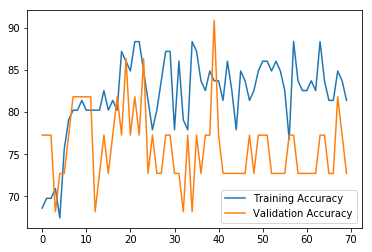

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 54.54545454545455%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 59.09090909090909%
epoch 3 
epoch 4 
Best validation accuracy! iteration:32 accuracy: 63.63636363636363%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:56 accuracy: 68.18181818181819%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:88 accuracy: 72.72727272727272%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:152 accuracy: 77.27272727272728%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epo

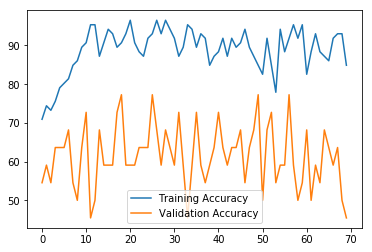

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 81.81818181818181%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:176 accuracy: 86.36363636363636%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch

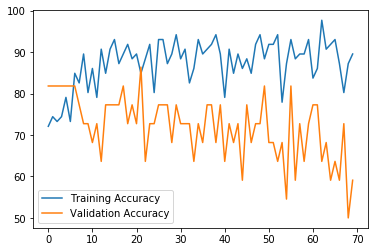

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 52.38095238095238%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 57.142857142857146%
epoch 3 
Best validation accuracy! iteration:24 accuracy: 66.66666666666666%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:200 accuracy: 71.42857142857143%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

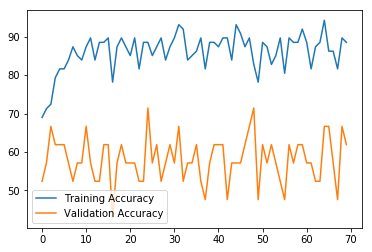

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 61.904761904761905%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
Best validation accuracy! iteration:224 accuracy: 66.66666666666666%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
Best

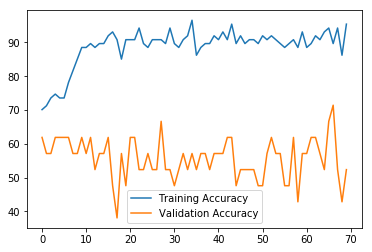

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 72.72727272727272%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 77.27272727272728%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

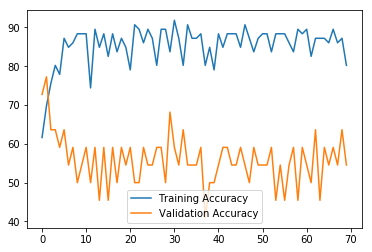

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 54.54545454545455%
epoch 3 
Best validation accuracy! iteration:24 accuracy: 63.63636363636363%
epoch 4 
Best validation accuracy! iteration:32 accuracy: 68.18181818181819%
epoch 5 
Best validation accuracy! iteration:40 accuracy: 77.27272727272728%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch

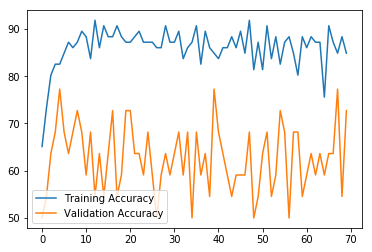

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 68.18181818181819%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:48 accuracy: 72.72727272727272%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

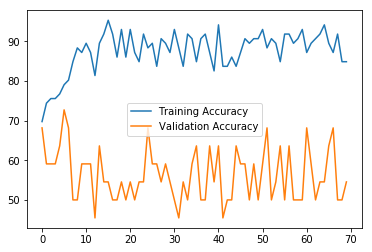

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 76.19047619047619%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 90.47619047619048%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

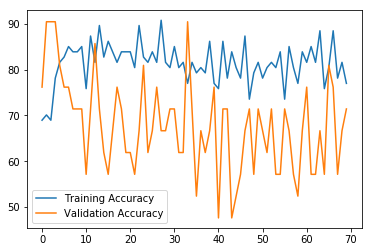

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 61.904761904761905%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 71.42857142857143%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:40 accuracy: 76.19047619047619%
epoch 6 
Best validation accuracy! iteration:48 accuracy: 85.71428571428571%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

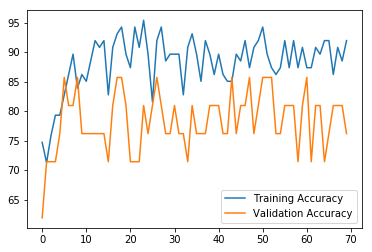

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 54.54545454545455%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 59.09090909090909%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:88 accuracy: 63.63636363636363%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
Best validation accuracy! iteration:368 accuracy: 68.18181818181819%
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

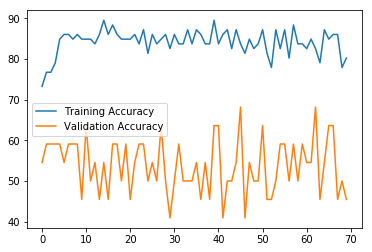

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 72.72727272727272%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:48 accuracy: 77.27272727272728%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
Best validation accuracy! iteration:264 accuracy: 81.81818181818181%
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 6

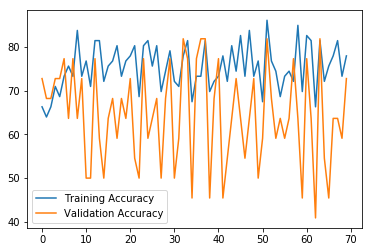

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 63.63636363636363%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:40 accuracy: 68.18181818181819%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

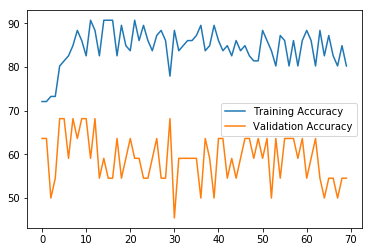

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 71.42857142857143%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 76.19047619047619%
epoch 3 
Best validation accuracy! iteration:24 accuracy: 80.95238095238095%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61

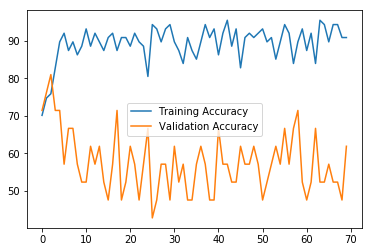

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 57.142857142857146%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:56 accuracy: 61.904761904761905%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:96 accuracy: 66.66666666666666%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
Best validation accuracy! iteration:376 accuracy: 71.42857142857143%
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

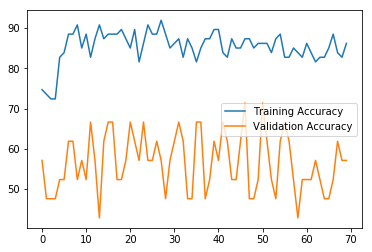

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 36.36363636363637%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 45.45454545454545%
epoch 3 
Best validation accuracy! iteration:24 accuracy: 63.63636363636363%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:48 accuracy: 68.18181818181819%
epoch 7 
Best validation accuracy! iteration:56 accuracy: 72.72727272727272%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
ep

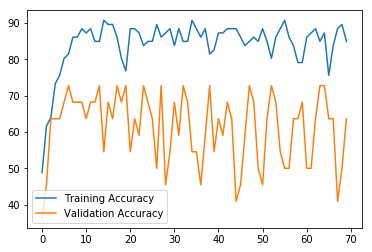

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 68.18181818181819%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 77.27272727272728%
epoch 3 
epoch 4 
Best validation accuracy! iteration:32 accuracy: 81.81818181818181%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61

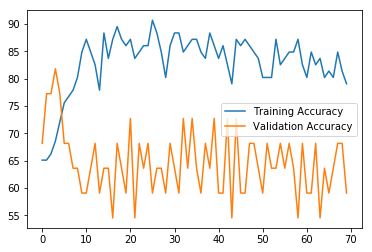

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 54.54545454545455%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 63.63636363636363%
epoch 3 
epoch 4 
Best validation accuracy! iteration:32 accuracy: 68.18181818181819%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:56 accuracy: 72.72727272727272%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:96 accuracy: 77.27272727272728%
epoch 13 
Best validation accuracy! iteration:104 accuracy: 81.81818181818181%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epo

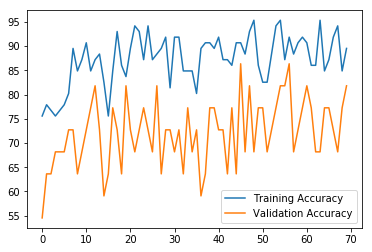

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 61.904761904761905%
epoch 2 
epoch 3 
Best validation accuracy! iteration:24 accuracy: 66.66666666666666%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:48 accuracy: 71.42857142857143%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:288 accuracy: 76.19047619047619%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

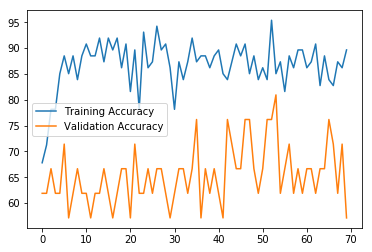

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 61.904761904761905%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:88 accuracy: 66.66666666666666%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:256 accuracy: 76.19047619047619%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
Best validation accuracy! 

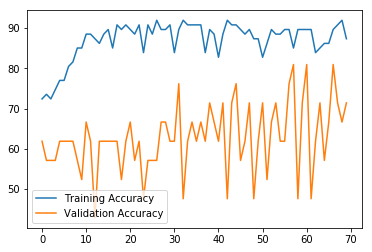

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 68.18181818181819%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:360 accuracy: 72.72727272727272%
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch

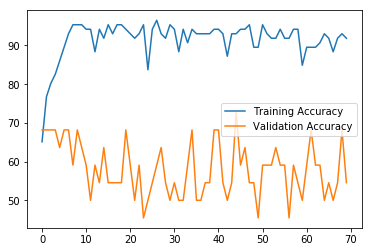

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 68.18181818181819%
epoch 2 
epoch 3 
Best validation accuracy! iteration:24 accuracy: 72.72727272727272%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
Best validation accuracy! iteration:432 accuracy: 77.27272727272728%
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 6

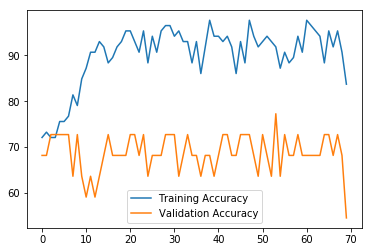

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 68.18181818181819%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
Best validation accuracy! iteration:264 accuracy: 72.72727272727272%
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch

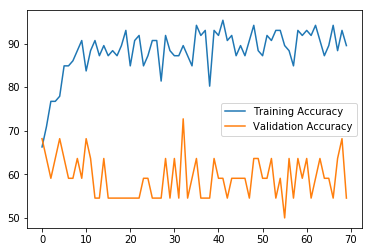

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 66.66666666666666%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:64 accuracy: 76.19047619047619%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

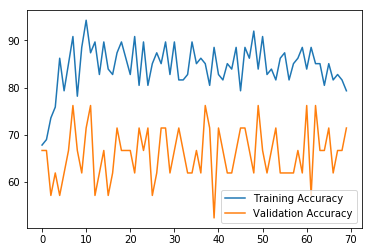

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 66.66666666666666%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 71.42857142857143%
epoch 3 
epoch 4 
Best validation accuracy! iteration:32 accuracy: 76.19047619047619%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:56 accuracy: 80.95238095238095%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:96 accuracy: 85.71428571428571%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
ep

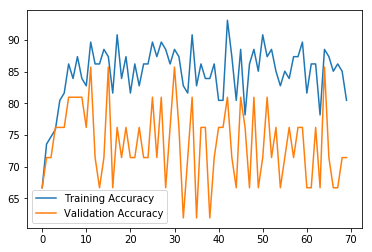

AD_MCI average accuracy is:  78.35497835497837
AD_MCI standard deviation is:  6.549255636044135


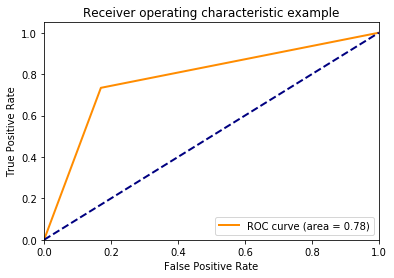

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.NNN_test import nnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(Xvar_admci,y_admci):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xvar_admci[train_index],Xvar_admci[test_index]
    y_train,y_test=y_admci[train_index],y_admci[test_index]
    mask_train = np.random.choice(X_train.shape[0],X_train.shape[0], replace=False)
    X_train=X_train[mask_train,:]
    y_train=y_train[mask_train,]
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=nnn_training(X_train,y_train,X_test,y_test,fc_units=[3000,1000,2], l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=70,batch_size=10)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_MCI average accuracy is: ',mean_acc)
print('AD_MCI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/ADNI_ADMCI_ROC_curve_NNN.jpg')
plt.show()